# Exploratory Data Analysis - *Hotel Bookings*

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [9]:
import os
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'Exploratory Data Analysis Pt-1.ipynb',
 'Exploratory Data Analysis Pt-2.ipynb',
 'Exploratory Data Analysis Pt-3.ipynb',
 'Food and Calories - Sheet1.csv',
 'hotel_bookings.csv',
 'pokemon.png',
 'pokemons.csv']

In [10]:
# ANSI Escape Codes for BOLD and Resetting formatting - to be used in print() method ..

B = "\033[1m"
R = "\033[0m"

In [11]:
# To avoid the data read error for UTF and other formats ..
import chardet

with open("hotel_bookings.csv", 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    detected_encoding = result['encoding']
    print(f"Detected encoding: {B}{detected_encoding}{R}")

Detected encoding: ascii


In [53]:
data = pd.read_csv("hotel_bookings.csv", encoding = detected_encoding)
print("Dataset has been read successfully.")

Dataset has been read successfully.


In [13]:
data.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
102196,City Hotel,0,0,2017,April,14,4,0,1,1,...,No Deposit,NaN,NaN,0,Transient,140.00,0,1,Check-Out,2017-04-05
74309,City Hotel,1,351,2015,October,40,3,2,1,2,...,No Deposit,1.0,NaN,0,Transient-Party,62.80,0,0,Canceled,2015-01-01
60106,City Hotel,1,95,2016,November,45,5,0,1,1,...,No Deposit,NaN,NaN,0,Transient-Party,75.00,0,0,Canceled,2016-10-21
291,Resort Hotel,0,0,2015,July,28,11,0,1,1,...,No Deposit,NaN,NaN,0,Transient,123.00,0,0,Check-Out,2015-07-12
42766,City Hotel,0,2,2015,September,37,10,0,1,2,...,No Deposit,69.0,NaN,0,Transient,0.00,0,1,Check-Out,2015-09-11
29153,Resort Hotel,0,0,2016,October,43,21,0,1,2,...,No Deposit,240.0,NaN,0,Transient,75.00,0,0,Check-Out,2016-10-22
97762,City Hotel,0,0,2016,September,39,20,0,0,2,...,No Deposit,9.0,NaN,0,Transient,0.00,0,1,Check-Out,2016-09-20
2096,Resort Hotel,0,79,2015,October,40,1,2,3,2,...,No Deposit,115.0,NaN,0,Contract,66.00,0,0,Check-Out,2015-10-06
82737,City Hotel,0,0,2016,January,2,5,0,1,2,...,No Deposit,NaN,NaN,0,Transient,89.00,0,0,Check-Out,2016-01-06
15532,Resort Hotel,0,44,2015,July,30,22,0,2,2,...,No Deposit,241.0,NaN,0,Transient,187.11,1,0,Check-Out,2015-07-24


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [16]:
print(f"Summary of NULL Values found in the dataset : \n{B}{data.isna().sum()}{R}")

Summary of NULL Values found in the dataset : 
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent     

In [17]:
print(f"\nSummary of percentage of {B}duplicate values{R} found in the features :\n")
for col in data.columns:
    duplicate_percentage = round((data[col].duplicated().sum()/len(data) * 100), 2)
    if duplicate_percentage > 0:
        print(f"{col:<30} : {B}{duplicate_percentage}{R}")


Summary of percentage of duplicate values found in the features :

hotel                          : 100.0
is_canceled                    : 100.0
lead_time                      : 99.6
arrival_date_year              : 100.0
arrival_date_month             : 99.99
arrival_date_week_number       : 99.96
arrival_date_day_of_month      : 99.97
stays_in_weekend_nights        : 99.99
stays_in_week_nights           : 99.97
adults                         : 99.99
children                       : 99.99
babies                         : 100.0
meal                           : 100.0
country                        : 99.85
market_segment                 : 99.99
distribution_channel           : 100.0
is_repeated_guest              : 100.0
previous_cancellations         : 99.99
previous_bookings_not_canceled : 99.94
reserved_room_type             : 99.99
assigned_room_type             : 99.99
booking_changes                : 99.98
deposit_type                   : 100.0
agent                          : 99.

In [18]:
print(f"\nSummary of percentage of {B}Unique values{R} found in the features :\n")
for col in data.columns:
    unique_percentage = round((data[col].nunique()/len(data) * 100), 2)
    if unique_percentage > 0:
        print(f"{col:<30} : {B}{unique_percentage}{R}")


Summary of percentage of Unique values found in the features :

lead_time                      : 0.4
arrival_date_month             : 0.01
arrival_date_week_number       : 0.04
arrival_date_day_of_month      : 0.03
stays_in_weekend_nights        : 0.01
stays_in_week_nights           : 0.03
adults                         : 0.01
country                        : 0.15
market_segment                 : 0.01
previous_cancellations         : 0.01
previous_bookings_not_canceled : 0.06
reserved_room_type             : 0.01
assigned_room_type             : 0.01
booking_changes                : 0.02
agent                          : 0.28
company                        : 0.29
days_in_waiting_list           : 0.11
adr                            : 7.44
total_of_special_requests      : 0.01
reservation_status_date        : 0.78


<Axes: >

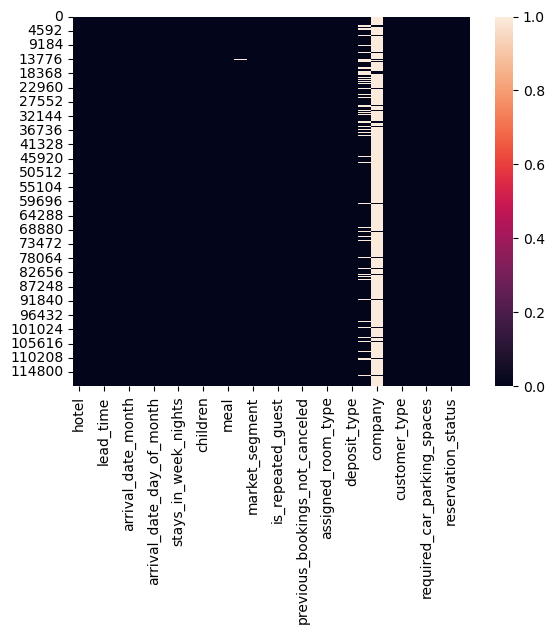

In [19]:
sns.heatmap(data.isnull())

In [20]:
print(f"\nSummary of percentage of {B}NULL values{R} found in the features :\n")
for col in data.columns:
    null_percentage = round((data[col].isnull().sum()/len(data) * 100), 2)
    if null_percentage > 0:
        print(f"{col:<10} : {B}{null_percentage}{R}")


Summary of percentage of NULL values found in the features :

country    : 0.41
agent      : 13.69
company    : 94.31


### We can observe `company` has 94.31% of missing data, hence we can drop the feature, it may help in better analysis.

In [21]:
data.shape

(119390, 32)

In [54]:
data.drop('company', axis = 1, inplace = True)
data.shape

(119390, 31)

In [23]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [24]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [25]:
data.select_dtypes(include=['category']).columns.tolist()

[]

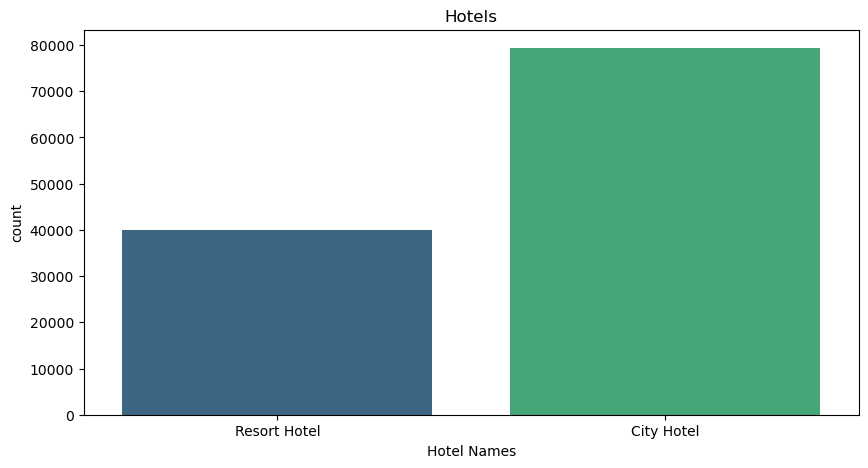

In [26]:
plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = 'hotel', palette = 'viridis')
plt.xlabel("Hotel Names")
plt.title("Hotels")
plt.show()

In [28]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Representation of arrivals each month

In [56]:
months = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
]

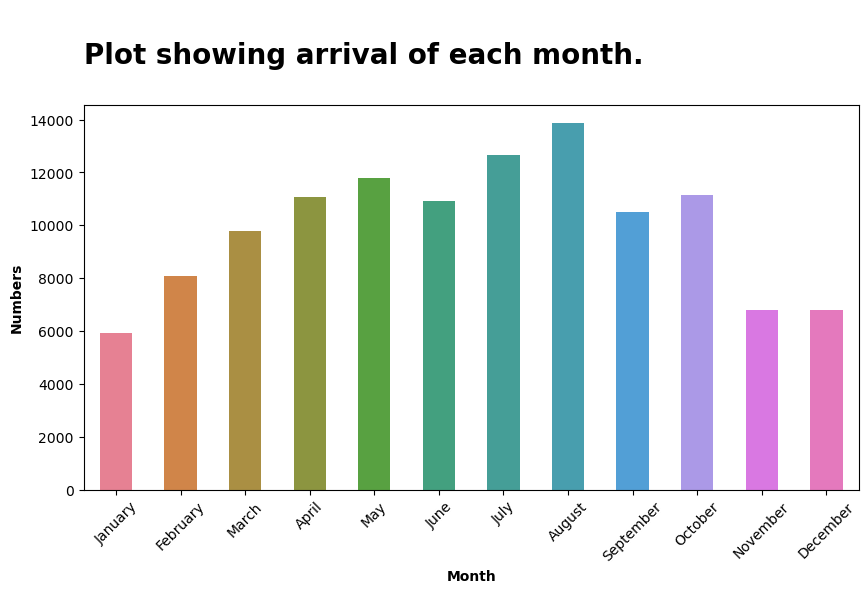

In [58]:
plt.figure(figsize = (10, 5))
sns.countplot(data = data,
              x = data.arrival_date_month.sort_values(),
              order = months,
              width = 0.5,
              palette = 'husl')
plt.xticks(rotation = 45)
plt.xlabel("Month", fontweight = 'bold')
plt.ylabel("Numbers", fontweight = 'bold')
plt.title("\nPlot showing arrival of each month.\n",
          fontsize = 20,
          fontweight = 'bold',
          loc = 'left')
plt.show()

### Ratio of Hotel Booking Cancelled

In [62]:
data.is_canceled.unique()

array([0, 1], dtype=int64)

In [63]:
data.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

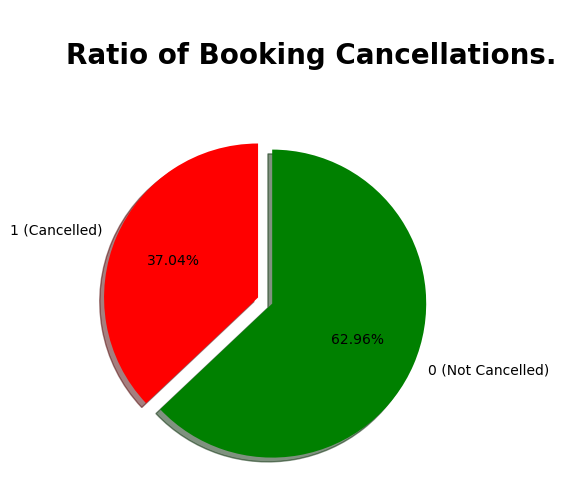

In [68]:
plt.figure(figsize = (10, 5))
plt.pie(data.is_canceled.value_counts(),
        labels = ['0 (Not Cancelled)', '1 (Cancelled)'],
        autopct = "%.2f%%",
        shadow = True,
        explode = [0.1, 0],
        colors = ['green', 'red'],
        counterclock = False,
        startangle = -270
       )
plt.title("\nRatio of Booking Cancellations.\n",
          fontsize = 20,
          fontweight = 'bold',
          loc = 'left')
plt.show()

### Hotel Arrival Years

In [69]:
data.arrival_date_year.unique()

array([2015, 2016, 2017], dtype=int64)

In [132]:
data.arrival_date_year.value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [98]:
arrival_order = data.arrival_date_year.value_counts().sort_index().index.tolist()
arrival_order

[2015, 2016, 2017]

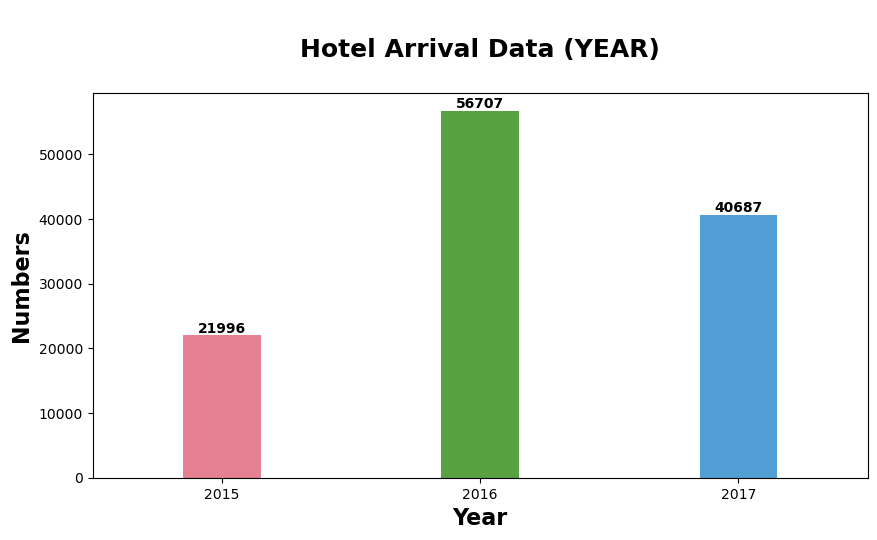

In [131]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(data = data,
              x = data.arrival_date_year.sort_values(),
              order = data.arrival_date_year.value_counts().sort_index().index.tolist(),
              width = 0.3, palette = 'husl')
for container in ax.containers:
    ax.bar_label(container, fontweight = 'bold')
plt.title("\nHotel Arrival Data (YEAR)\n", fontweight = 'bold', fontsize = 18)
plt.xlabel("Year", fontweight = 'bold', fontsize = 16)
plt.ylabel("Numbers", fontweight = 'bold', fontsize = 16)
plt.show()

### Parking Requirements

In [136]:
data.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [149]:
data.required_car_parking_spaces.unique().tolist()

[0, 1, 2, 8, 3]

In [150]:
data.required_car_parking_spaces.value_counts()

required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
Name: count, dtype: int64

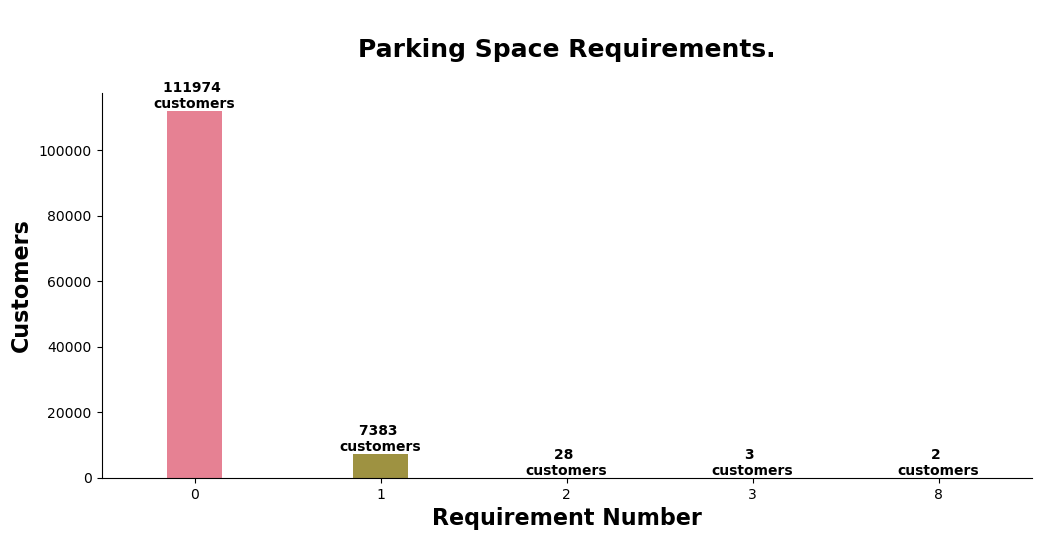

In [163]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = data,
              x = data.required_car_parking_spaces,
              order = data.required_car_parking_spaces.value_counts().sort_index().index.tolist(),
              width = 0.3, palette = 'husl')
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x:g} \ncustomers', fontweight = 'bold', fontsize = 10)
plt.title("\nParking Space Requirements.\n", fontweight = 'bold', fontsize = 18)
plt.xlabel("Requirement Number", fontweight = 'bold', fontsize = 16)
plt.ylabel("Customers", fontweight = 'bold', fontsize = 16)
sns.despine()
plt.show()

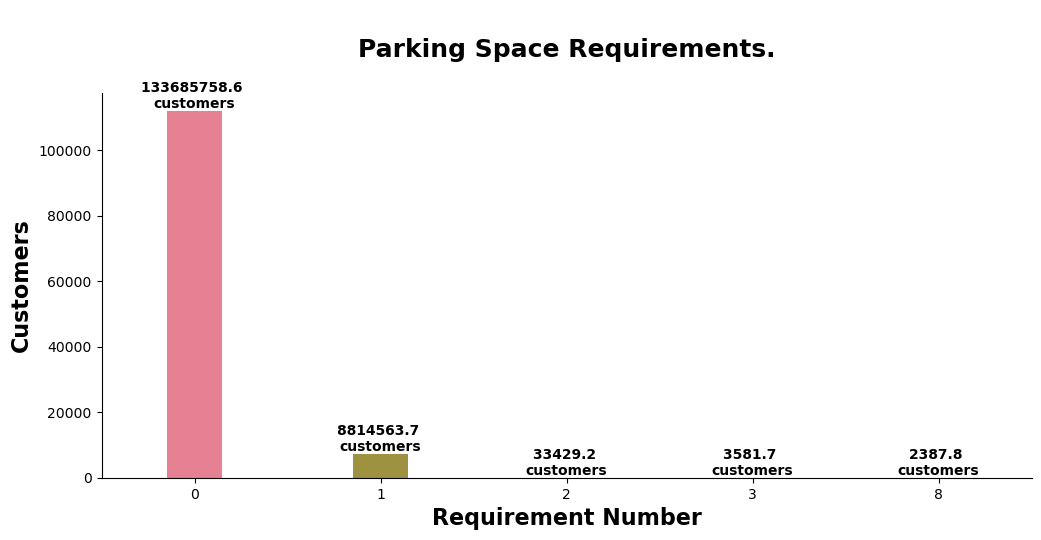

In [164]:
plt.figure(figsize = (12, 5))
ax = sns.countplot(data = data,
              x = data.required_car_parking_spaces,
              order = data.required_car_parking_spaces.value_counts().sort_index().index.tolist(),
              width = 0.3, palette = 'husl')
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x / len(data) / 100:.1f} \ncustomers', fontweight = 'bold', fontsize = 10)
plt.title("\nParking Space Requirements.\n", fontweight = 'bold', fontsize = 18)
plt.xlabel("Requirement Number", fontweight = 'bold', fontsize = 16)
plt.ylabel("Customers", fontweight = 'bold', fontsize = 16)
sns.despine()
plt.show()